##  Shifted Schwefel’s (F2) with Dimension 50

In [24]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [25]:
dataset = pd.read_csv("Schwefel_dataset_data.csv")
Schwefel_dataset = dataset["val"].tolist()

In [26]:
Dims = 50
bias = -450
lower_bound = -100
upper_bound = 100
solution_list = []

In [27]:
# Shifted Sphere Function as given in the cec2008 tech report
def define_function(x, data=Schwefel_dataset, dim=Dims, f_bias=bias):
    Function = abs(x[0] - data[0])
    for i in range(dim - 1):
        z = x[i] - data[i]
        Function = max(Function, abs(z))
    result = Function + f_bias
    return result

In [28]:
# Solution Compiler
def solution_set(allsol):
    solution_result = define_function(allsol)
    solution_list.append(solution_result)
    return solution_result

In [29]:
# Solution Computer
def compute_solution(dimension, lower_bound, upper_bound):
    global sol
    xmin = lower_bound * np.ones(dimension)
    xmax = upper_bound * np.ones(dimension)
    x0 = np.random.uniform(min(xmin), max(xmax), dimension)
    
    # Minimizing the function using BFGS algorithm (Scipy)
    sol = minimize(solution_set, x0, bounds=(lower_bound, upper_bound), method='BFGS', callback=solution_set)
    return sol, solution_list

In [30]:
# Initial Time
start_time = time.time()

In [31]:
# computing the problem
compute_solution(Dims, lower_bound, upper_bound)

(      fun: -449.99999692431544
  hess_inv: array([[ 4.23052767e-06, -1.51931167e-07,  1.21018874e-06, ...,
         -4.08945257e-06, -1.26342650e-06,  0.00000000e+00],
        [-1.51931167e-07,  6.74268581e-06,  2.14345342e-07, ...,
          1.25628526e-07, -8.45089205e-08,  0.00000000e+00],
        [ 1.21018874e-06,  2.14345342e-07,  4.69988353e-06, ...,
         -1.25918651e-06, -3.88692905e-06,  0.00000000e+00],
        ...,
        [-4.08945257e-06,  1.25628526e-07, -1.25918651e-06, ...,
          4.14390721e-06,  1.27505928e-06,  0.00000000e+00],
        [-1.26342650e-06, -8.45089205e-08, -3.88692905e-06, ...,
          1.27505928e-06,  5.79232799e-06,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
       jac: array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,

In [32]:
# End Time and computing time
end_time = time.time()
computation_time = end_time - start_time

In [33]:
# Displaying Parameters and Insights
print("Function_Name: Shifted shwefel\n")
print("01. Chosen algorithm: BFGS (SciPy)\n")
print("02. Parameters of the Algorithm:")
print("\nDimension:", Dims)
print("\nLower and Upper Bounds: [", lower_bound, ",", upper_bound, "]")
print("\nBias:", bias)
print("\n03. Result:")
sol_df = pd.DataFrame(sol.x, columns=[''])
sol_df.to_csv("shwefel50.csv", sep=",")
print("\n    - Solutions:", sol_df)
print("\n    - Fitness:", round(sol.fun, 2))
print("\nNumber of function evaluations:", sol.nfev)
print("\nStopping criterion:", sol.nit, "iterations")
print("\nComputational time:", round(computation_time, 2), "seconds\n")

Function_Name: Shifted shwefel

01. Chosen algorithm: BFGS (SciPy)

02. Parameters of the Algorithm:

Dimension: 50

Lower and Upper Bounds: [ -100 , 100 ]

Bias: -450

03. Result:

    - Solutions:              
0  -26.887900
1   -4.909031
2  -56.826026
3  -95.043669
4   -4.339777
5  -50.297067
6   -2.752898
7  -84.856154
8  -74.533727
9  -60.380275
10 -61.206292
11 -53.791176
12  -4.573087
13 -28.685218
14 -87.253766
15 -56.484867
16 -50.787414
17 -42.895372
18 -78.495779
19 -76.628175
20 -47.806208
21 -78.919999
22 -65.532601
23 -55.289589
24  -6.897855
25 -31.464036
26 -22.127975
27 -71.862483
28 -55.597405
29 -47.013952
30 -75.027271
31 -72.129813
32 -50.368718
33 -62.994490
34 -96.771794
35 -81.605072
36 -96.627655
37 -53.336103
38 -60.055516
39 -63.201974
40  -5.809143
41 -72.122048
42 -21.869079
43 -48.631387
44  -2.334505
45 -82.185993
46 -13.864166
47 -68.074654
48 -37.049684
49 -13.656766

    - Fitness: -450.0

Number of function evaluations: 27693

Stopping criterion: 234 

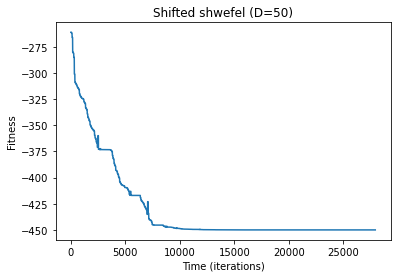

In [35]:
# Plotting function
def fitness_curve(solution):
    plt.plot(solution)
    plt.title("Shifted shwefel (D=50)")
    plt.xlabel("Time (iterations)")
    plt.ylabel("Fitness")
    plt.show()
fitness_curve(solution_list)